In [ ]:
# imports libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


**TASK-A** : Please provide the descriptive stats of the dataset. How would you comment on these descriptive statistics?


In [ ]:
# Reads data and Show head and column name of Data set
data = pd.read_csv('data.csv',encoding= 'unicode_escape')
print(data.head())
print(data.columns)

  InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
data.describe(include="all").T # Describe data
# We observe that there are also missing values for the data set. 
# Since Quantity and UnitPrice min values are negative, we can guess that there are negative numbers in these column. 
# İncludes numeric values in "UnitPrice" and "Quantity" columns 
# Dataset contains a total of 541909 data information

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,NaN,NaN,NaN,15287.7,1713.6,12346,13953,15152,16791,18287
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**TASK-B** : Are there any nan values in the dataset? Please provide numerical values for the nan values.


In [ ]:
data.columns[data.isnull().any()] # Columns with nan values 

Index(['Description', 'CustomerID'], dtype='object')

In [ ]:
# Visualization of the number of missing data for each column and its percentage to the total data
data_missing= pd.DataFrame()
data_missing[" Mising Values"] = data.isnull().sum().sort_values(ascending=False)
data_missing[" % Missing Value"] = round(data.isnull().sum()*100/len(data.index),2)
data_missing

,Mising Values,% Missing Value
CustomerID,135080,24.93
Description,1454,0.27
Country,0,0.00
UnitPrice,0,0.00
InvoiceDate,0,0.00
Quantity,0,0.00
StockCode,0,0.00
InvoiceNo,0,0.00


**TASK-C**:  Please provide figures for the transaction distributions with respect to the months, days, and countries respectively.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f80a2cd5b90>,
 [Text(0, 0, 'Jan-2010'),
  Text(0, 0, 'Feb-2011'),
  Text(0, 0, 'Mar-2011'),
  Text(0, 0, 'Apr-2011'),
  Text(0, 0, 'May-2011'),
  Text(0, 0, 'Jun-2011'),
  Text(0, 0, 'July-2011'),
  Text(0, 0, 'Aug-2011'),
  Text(0, 0, 'Sep-2011'),
  Text(0, 0, 'Oct-2011'),
  Text(0, 0, 'Nov-2011'),
  Text(0, 0, 'Dec-2010')])

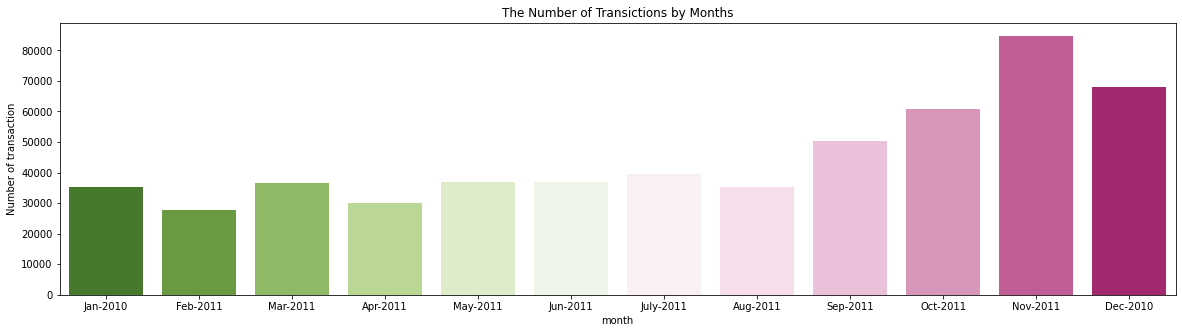

In [ ]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"]) # Converts InvoiceDate values to datatime object

# Creates new columns for day, mont and year informations 
data['day'] = data['InvoiceDate'].dt.dayofweek
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

# Visualize the distribution of transactions by month 
df_2 = data.groupby("month", as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_2.month, df_2.InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of transaction")
plt.title("The Number of Transictions by Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan-2010","Feb-2011","Mar-2011","Apr-2011","May-2011","Jun-2011","July-2011","Aug-2011","Sep-2011","Oct-2011","Nov-2011","Dec-2010"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f80a466f5d0>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tues'),
  Text(0, 0, 'Wen'),
  Text(0, 0, 'Thurs'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

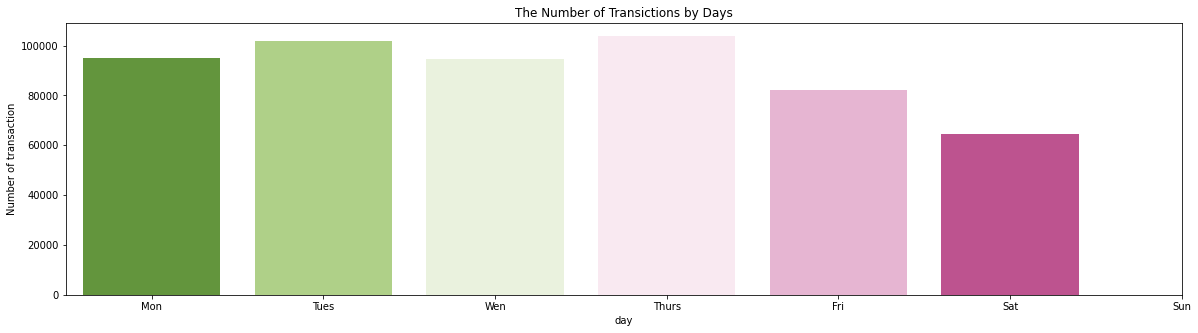

In [ ]:
# Visualize the distribution of transactions by day
df_2 = data.groupby("day", as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_2.day, df_2.InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of transaction")
plt.title("The Number of Transictions by Days")
plt.xticks([0,1,2,3,4,5,6],["Mon","Tues","Wen","Thurs","Fri","Sat","Sun"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

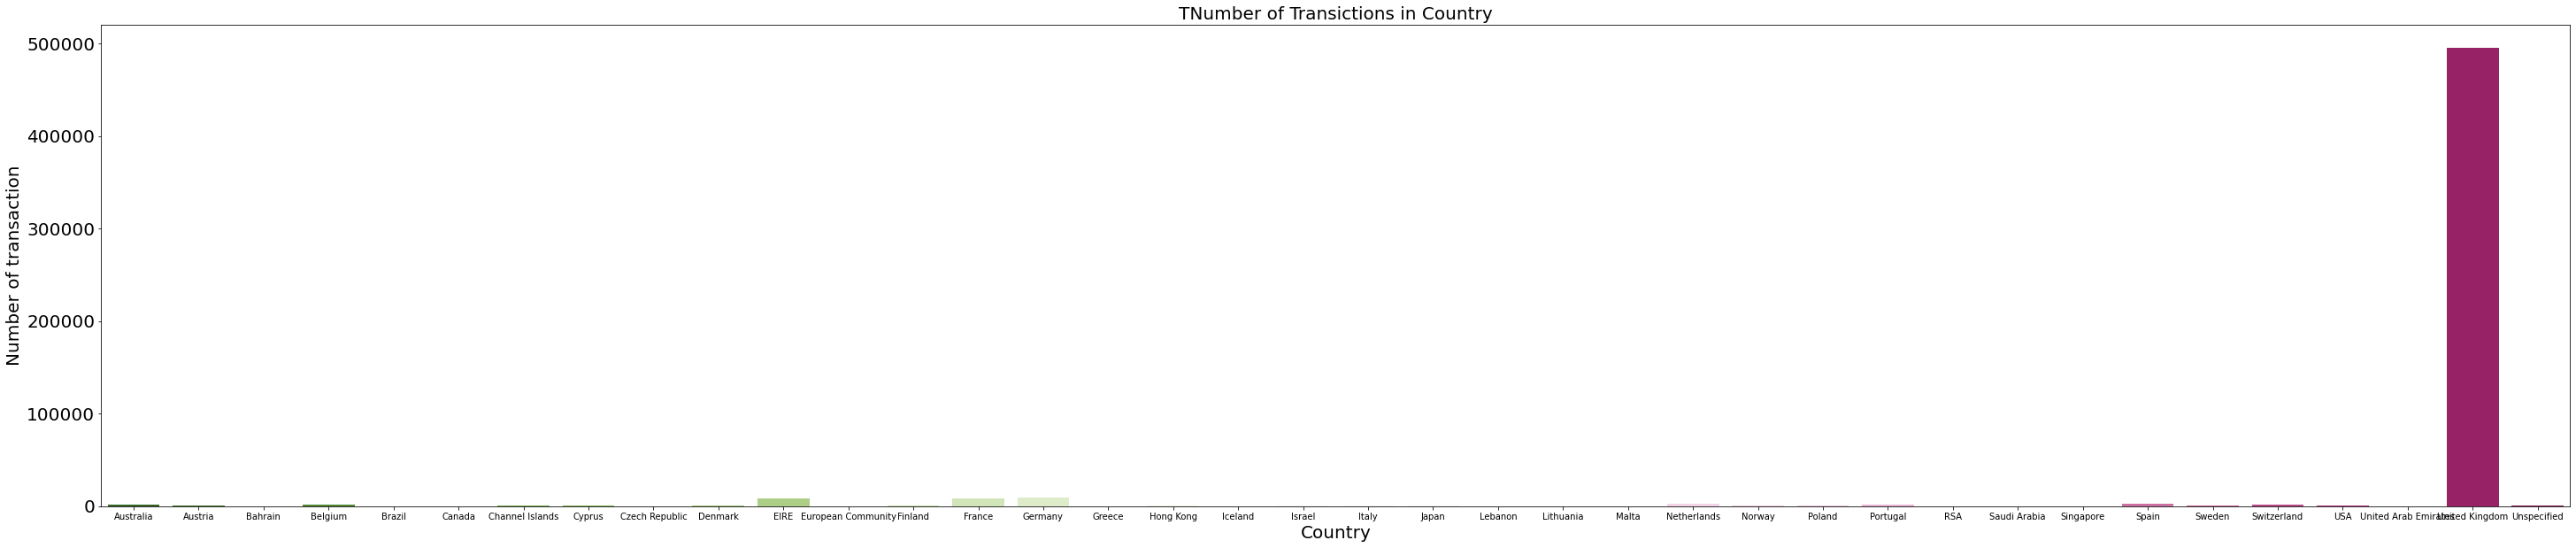

In [ ]:
# Visualize the distribution of transactions by country 
df_2 = data.groupby("Country", as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(50,10)) # Determines plot size
sns.barplot(df_2.Country, df_2.InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of transaction", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.title("TNumber of Transictions in Country", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)

**TASK-D** : Which customer has the highest order count, number of purchased items, total amount of payment, and canceled orders?


In [ ]:
# Highest order count

data['Order'] = list(map(lambda x: not x.startswith('C'), data['InvoiceNo'])) # Create new column 'order'. If InvoiceNo  not startswith C, get True in corresponding cell.

data['Order']= data['Order'].astype(int)  # Convert boolean values to integer in "Order"' column.

# Group data(which "Order" equal to 1) by CustomerID, InvoiceNo, and order. Find the sum of Quantity.
df_1 = data[data['Order']==1].groupby('CustomerID', as_index=False)['Order'].sum()

df_1 = df_1.sort_values(by='Order', ascending=False)  # Sort the dataframe by order in ascending order and show the first data(highest order).
df_1.iloc[0]

CustomerID    17841.0
Order          7847.0
Name: 4011, dtype: float64

In [ ]:
# Highest number of purchased items
df_2 = data.groupby("CustomerID", as_index=False)["Quantity"].sum()
df_2 = df_2.sort_values(by="Quantity")
df_2.iloc[-1]

CustomerID     14646.0
Quantity      196719.0
Name: 1703, dtype: float64

In [ ]:
# Highest total amount of payment
data["TotalPrice"]= data["UnitPrice"]*data["Quantity"] # Adds new column for total price
df_3 = data.groupby("CustomerID", as_index=False)["TotalPrice"].sum()
df_3 = df_3.sort_values(by="TotalPrice") # Sort the dataframe by TotalPrice in ascending order show the last data(highest total amount of payment).
df_3.iloc[-1]

CustomerID     14646.00
TotalPrice    279489.02
Name: 1703, dtype: float64

In [ ]:
# Determines who cancels the most orders 

data['Canceled_order'] = list(map(lambda x: x.startswith('C'), data['InvoiceNo'])) # Create new column 'Canceled_order'. If InvoiceNo startswith C, get True in corresponding cell.

data['Canceled_order']= data['Canceled_order'].astype(int)  # Convert boolean values to integer in Canceled_order' column.

# Group data(which canceled_order equal to 1) by CustomerID, InvoiceNo, and Canceled order. Find the sum of Quantity.
df_4 = data[data['Canceled_order']==1].groupby('CustomerID', as_index=False)['Canceled_order'].sum()

df_4 = df_4.sort_values(by='Canceled_order', ascending=False)  # Sort the dataframe by Canceled_order in ascending order and show the first data(highest canceled).
df_4.iloc[0]

CustomerID        14911.0
Canceled_order      226.0
Name: 736, dtype: float64

**Task-8E:** Please provide the histogram plots for each of the variables then discuss and comment on their distributions briefly.

Text(0.5, 1.0, 'Quantity Distribution')

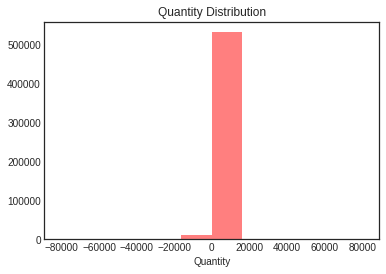

In [ ]:
plt.style.use("seaborn-white")
# Quantitiy values distirbutions on histogram
plt.hist(data["Quantity"],alpha=0.5,histtype="stepfilled",color="red",edgecolor="none")
plt.xlabel("Quantity")
plt.title("Quantity Distribution")

Text(0.5, 1.0, ' Unit Pirce Values Distribution')

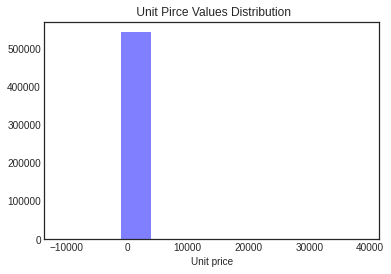

In [ ]:
# UnitPrice values distirbutions on histogram
plt.hist(data["UnitPrice"],alpha=0.5,histtype="stepfilled",color="blue",edgecolor="none")
plt.xlabel("Unit price")
plt.title(" Unit Pirce Values Distribution")

Text(0.5, 1.0, ' Total Pirce Values Distribution')

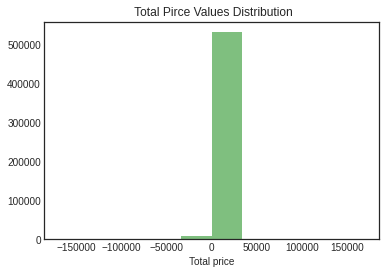

In [ ]:
# TotalPrice values distirbution on histogram
plt.hist(data["TotalPrice"],alpha=0.5,histtype="stepfilled",color="green",edgecolor="none")
plt.xlabel("Total price")
plt.title(" Total Pirce Values Distribution")

**My comment about histogram distrubutions :** Because the value ranges are too wide and the data set contains too much data, a backlog is observed in a small range of values. Visualizations made using the log transformation method can be made meaningful. 

**Task-8F:** Please provide the histogram plots for these but after applying log transformation on the dataset.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Quantity Distribution')

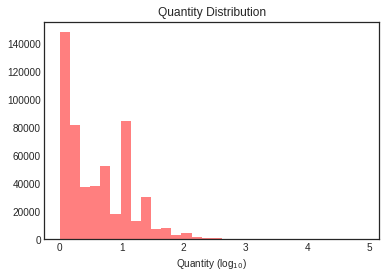

In [ ]:
# Quantitiy values distirbutions with log transformation on histogram
plt.hist(np.log10(data["Quantity"]),bins=30, alpha=0.5,histtype="stepfilled",color="red",edgecolor="none")
plt.xlabel("Quantity (log$_{10}$) ")
plt.title("Quantity Distribution")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'UnitPrice Distribution')

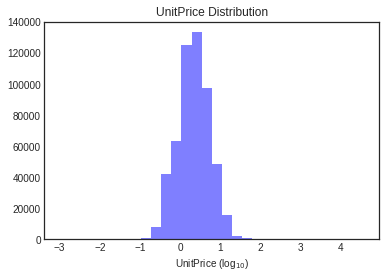

In [ ]:
# I got a "ValueError: range parameter must be finite.". Contains the code block where I used the isfinite function to fix this 
# Reference : https://stackoverflow.com/questions/51642846/python-histogram-valueerror-range-parameter-must-be-finite
log10_UnitPrice = np.log10(data["UnitPrice"])
finiteUnitPrice= log10_UnitPrice[np.isfinite(log10_UnitPrice)].values
# Quantitiy values distirbutions with log transformation on histogram
plt.hist(finiteUnitPrice,bins=30, alpha=0.5,histtype="stepfilled",color="blue",edgecolor="none")
plt.xlabel("UnitPrice (log$_{10}$) ")
plt.title("UnitPrice Distribution")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'TotalPrice Distribution')

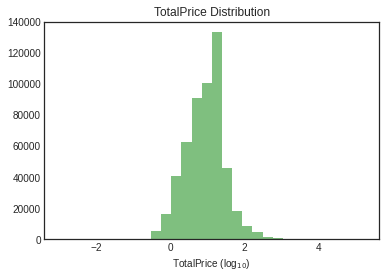

In [ ]:
# I got a "ValueError: range parameter must be finite.". Contains the code block where I used the isfinite function to fix this 
# Reference : https://stackoverflow.com/questions/51642846/python-histogram-valueerror-range-parameter-must-be-finite
log10_TotalPrice = np.log10(data["TotalPrice"])
finiteTotalPrice= log10_TotalPrice[np.isfinite(log10_TotalPrice)].values
# Quantitiy values distirbutions with log transformation on histogram
plt.hist(finiteTotalPrice,bins=30, alpha=0.5,histtype="stepfilled",color="green",edgecolor="none")
plt.xlabel("TotalPrice (log$_{10}$) ")
plt.title("TotalPrice Distribution")

**Task-8G**: Please provide a way to determine the outliers in the numeric values of this dataset.

In [ ]:
for i in ["Quantity","UnitPrice","TotalPrice"]: # Loop is created to access all rows containing numeric values
# For a data set that does not have a normal distribution, the formula determining the outliers is used. 
  median = np.nanmedian(data[i]) 
  Q3 = np.nanpercentile(data[i],75) 
  Q1 = np.nanpercentile(data[i],25) 
  iqr = Q3-Q1
  
  outlier_1 = data[i][data[i] < median - 1.5 * iqr].count() 
  outlier_2 = data[i][data[i] > median + 1.5 * iqr].count()
  print("Number of outlier values in",i,":",outlier_1+outlier_2) # Print total outliers values 


Number of outlier values in Quantity : 67000
Number of outlier values in UnitPrice : 66804
Number of outlier values in TotalPrice : 58897


**Task-8H:** Please provide a correlation matrix between the features in this dataset and discuss these values. 

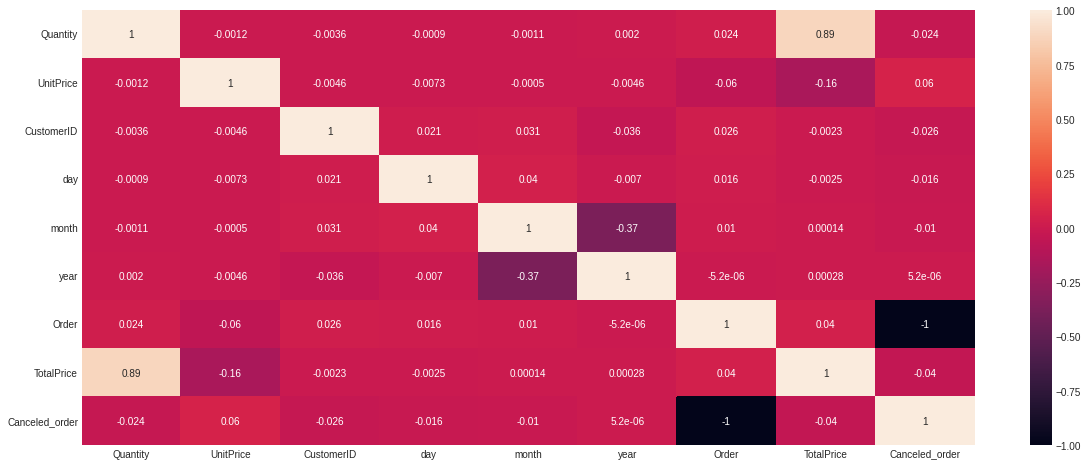

In [ ]:
fig, ax = plt.subplots(figsize=(20,8)) # For determine figure size
sns.heatmap(data.corr(), annot= True, ax=ax) # Heat map for show correlation between the features

**My comment about heatmap :**
- There seems to be a negative correlation between the values of the order and
the canceled order, as it should be. A person either placed the order or canceled that order. 
- There is a positive correlation between quantity and total price. Because if the Amount increases, the total money paid will increase. 
- Apart from this, zero or near-zero cells is observed in the table, which shows that the features are independent of each other. 

**Task-8I**: Please find the most frequently sold item as well as the item that has been sold in the highest quantity.

In [ ]:
# item that has been sold in the highest quantity
data["Description_lower_case"] =  data["Description"].str.lower() # Adds new column and convert description to lower case
# Some missing values fills as "?"" and "missing" in Description column that is why Converts to np.nan values these data.
data[data["Description_lower_case"]=="?"] = np.nan 
data[data["Description_lower_case"]=="missing"] = np.nan

df_5 = data.dropna() # The nan values are deleted from the data so that nan values do not cause confusion during grouping. 
# In order to find the most sold item, the data set is grouped according to the description information and the total value of the quantity is determined. 
df_5 = df_5.groupby("Description_lower_case", as_index=False)["Quantity"].sum()
df_5 = df_2.sort_values(by="Quantity") # Sort the dataframe by Quantity in ascending order and show the last data(highest quantity).
df_5.iloc[-1]

Description_lower_case    world war 2 gliders asstd designs
Quantity                                              53847
Name: 4097, dtype: object

In [ ]:
# Most frequently sold item
# I created order column in task-d. this column include not canceled order. We can find the most ordered frequency by looking at the number of orders, ignoring the quantity. 
df_6 = data[data['Order']==1].groupby('Description_lower_case', as_index=False)['Order'].sum() # In order to find the frequently sold item, the data set is grouped according to the description information and the total value of the order is determined. 

df_6 = df_6.sort_values(by='Order', ascending=False)  # Sort the dataframe by order in ascending order and show the first data(highest order).
df_6.iloc[0]

Description_lower_case    white hanging heart t-light holder
Order                                                   2327
Name: 3991, dtype: object